In [ ]:
from MarketDataLoader.MarketFromExcel import Market
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
import pandas as pd
from utils.paths import data_path

# Get the full path to the CSV file
xl_file = data_path('spx_1_nov_24.xlsx')

# Load the XL file into a DataFrame 
df = pd.read_excel(xl_file)  

# Check the loaded data
print(df.head())


      Date exp   FwdImp    95.0%    96.0%    97.0%    97.5%    98.0%    99.0%  \
0          NaN      NaN  5439.20  5496.50  5553.70  5582.40  5611.00  5668.30   
1  19 Nov 2024  5733.87    24.43    23.35    22.30    21.77    21.24    20.17   
2  20 Nov 2024  5734.49    24.29    23.22    22.18    21.65    21.12    20.04   
3  21 Nov 2024  5734.46    24.54    23.50    22.48    21.97    21.45    20.39   
4  22 Nov 2024  5736.56    24.49    23.45    22.44    21.94    21.44    20.40   

    100.0%   101.0%   102.0%   102.5%   103.0%   104.0%   105.0%   106.0%  \
0  5725.50  5782.80  5840.00  5868.60  5897.30  5954.50  6011.80  6069.00   
1    19.05    17.89    16.74    16.19    15.67    14.78    14.14    13.81   
2    18.93    17.79    16.66    16.12    15.61    14.73    14.09    13.74   
3    19.30    18.17    17.05    16.51    16.00    15.12    14.47    14.10   
4    19.30    18.17    17.05    16.53    16.03    15.16    14.47    14.02   

    107.0%   108.0%   109.0%   110.0%  
0  6126.30

In [3]:
pricingdate = datetime.datetime(2024, 11,1)

In [4]:
mkt = Market(xl_file, pricingdate)

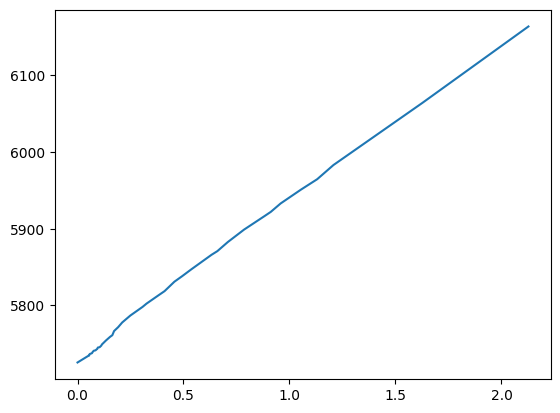

In [5]:
plt.plot(mkt.maturities, mkt.forward_curve)

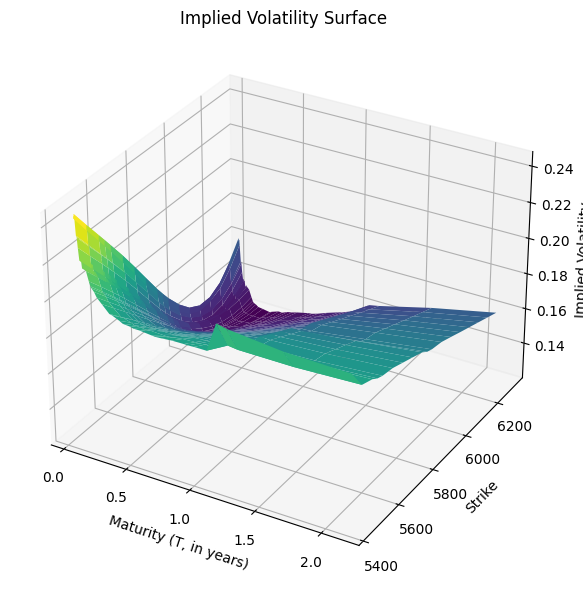

In [6]:


# Get the data
maturities = mkt.maturities[1:]  # skip pricing date (T=0)
strikes = mkt.strikes
vol_surface = mkt.vol_surface

# Create a meshgrid for plotting
T_grid, K_grid = np.meshgrid(maturities, strikes)

# Transpose vol surface to match meshgrid shape
Z = vol_surface.T  # shape must match (len(strikes), len(maturities))

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T_grid, K_grid, Z, cmap='viridis')

ax.set_title('Implied Volatility Surface')
ax.set_xlabel('Maturity (T, in years)')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Volatility')

plt.tight_layout()
plt.show()

